In [1]:
from EarthquakeSignal import config, EarthquakeBatchProcessor


In [2]:
# pip list

### Set config manual 

In [3]:
config = {
    'file_extension': '.txt',
    'unit_factor': 9.81,
    
    'apply_baseline_correction': True,
    'apply_arias_analysis': True,
    'apply_fourier_analysis': True,
    '_compute_newmark_spectra': True,
    'compute_rotd': False,
    'print_summary': True,
    
    'plot_signals': True,
    'plot_corrected_signals': False,
    'plot_arias_signals': False,
    'plot_fourier_signals': False,  
    'plot_newmark_spectra': True,
    'plot_rotd': False,
}


In [4]:
registers_path = r'data\Algarrobo1985'


[WARNING] Signal 'ChillanInstitute_Algarrobo1985_Y.txt' was padded with zeros to reach 27208 samples.
[WARNING] Signal 'ChillanInstitute_Algarrobo1985_Z.txt' was padded with zeros to reach 27208 samples.

📌 Earthquake ID: ChillanInstitute
Sampling interval (dt): 0.001586 s
Number of samples: 27208
Total duration: 43.15 s
Component information:
  - H1: file='ChillanInstitute_Algarrobo1985_X.txt', RMS=1.4098e-02
  - H2: file='ChillanInstitute_Algarrobo1985_Y.txt', RMS=1.4769e-02
  - V: file='ChillanInstitute_Algarrobo1985_Z.txt', RMS=8.7751e-03



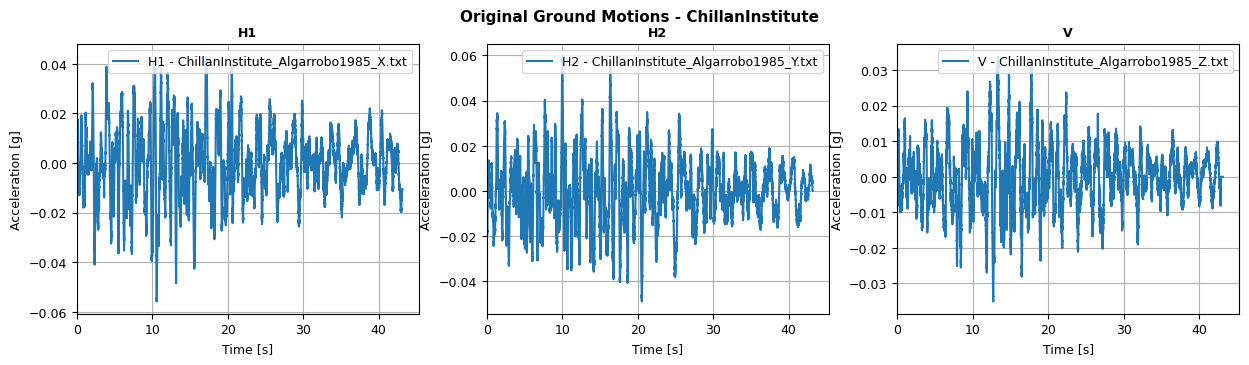

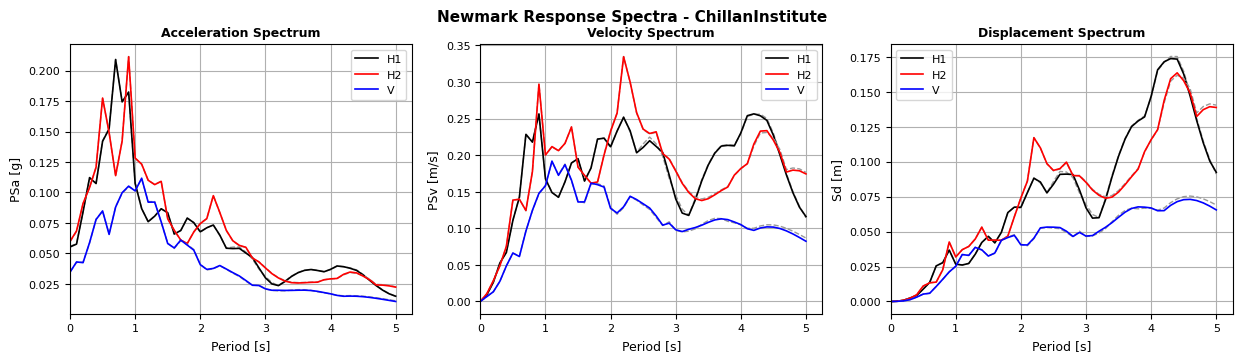

[WARNING] Signal 'Colbun_Algarrobo1985_Y.txt' was padded with zeros to reach 12819 samples.
[WARNING] Signal 'Colbun_Algarrobo1985_Z.txt' was padded with zeros to reach 12819 samples.

📌 Earthquake ID: Colbun
Sampling interval (dt): 0.005020 s
Number of samples: 12819
Total duration: 64.35 s
Component information:
  - H1: file='Colbun_Algarrobo1985_X.txt', RMS=1.0369e-02
  - H2: file='Colbun_Algarrobo1985_Y.txt', RMS=9.4560e-03
  - V: file='Colbun_Algarrobo1985_Z.txt', RMS=6.7791e-03



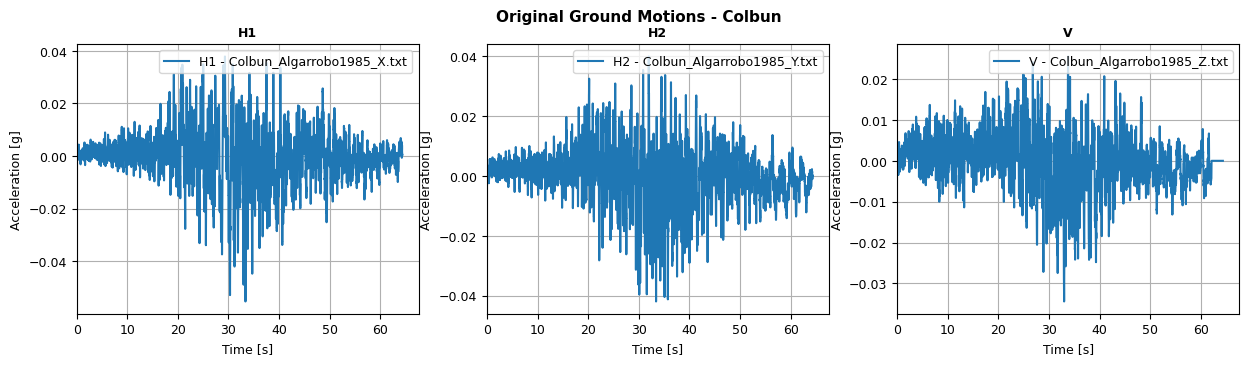

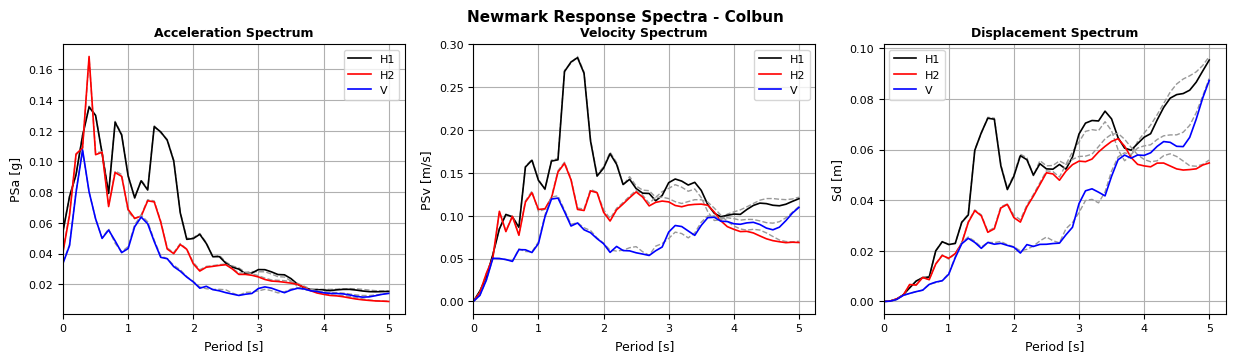

[WARNING] Signal 'Constitucion_Algarrobo1985_Y.txt' was padded with zeros to reach 21567 samples.
[WARNING] Signal 'Constitucion_Algarrobo1985_Z.txt' was padded with zeros to reach 21567 samples.

📌 Earthquake ID: Constitucion
Sampling interval (dt): 0.003344 s
Number of samples: 21567
Total duration: 72.12 s
Component information:
  - H1: file='Constitucion_Algarrobo1985_X.txt', RMS=2.7292e-02
  - H2: file='Constitucion_Algarrobo1985_Y.txt', RMS=1.7740e-02
  - V: file='Constitucion_Algarrobo1985_Z.txt', RMS=9.0692e-03



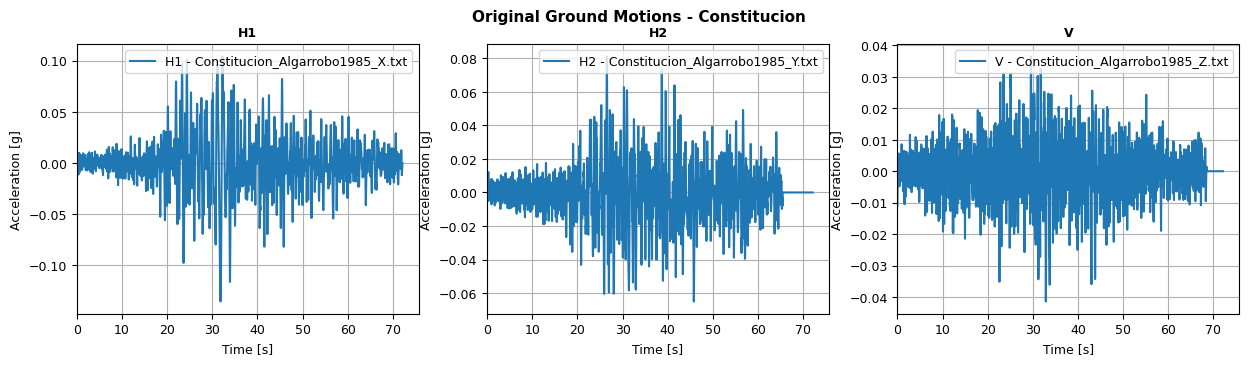

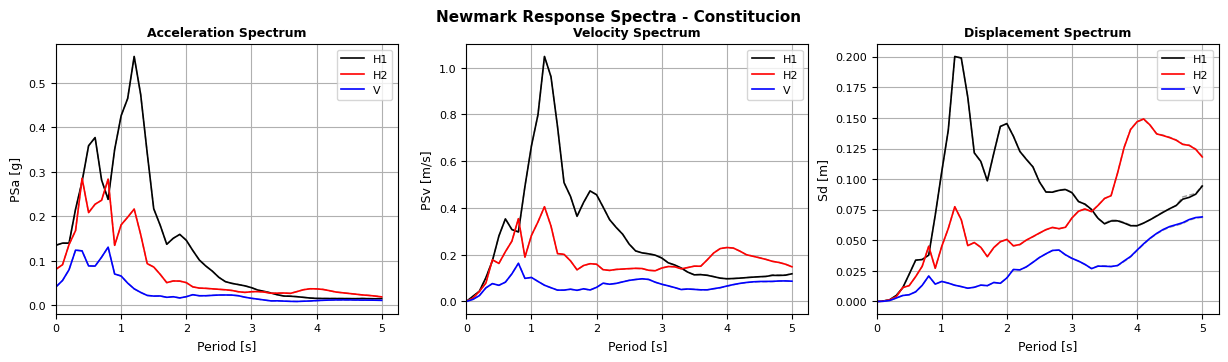

[WARNING] Signal 'Hualane_Algarrobo1985_X.txt' was padded with zeros to reach 20139 samples.
[WARNING] Signal 'Hualane_Algarrobo1985_Y.txt' was padded with zeros to reach 20139 samples.

📌 Earthquake ID: Hualane
Sampling interval (dt): 0.004012 s
Number of samples: 20139
Total duration: 80.80 s
Component information:
  - H1: file='Hualane_Algarrobo1985_X.txt', RMS=2.8771e-02
  - H2: file='Hualane_Algarrobo1985_Y.txt', RMS=2.5690e-02
  - V: file='Hualane_Algarrobo1985_Z.txt', RMS=1.7568e-02



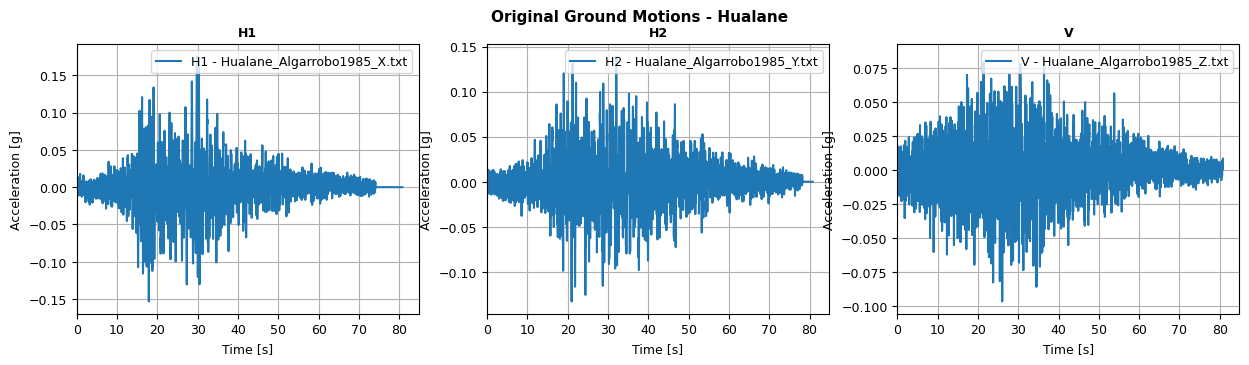

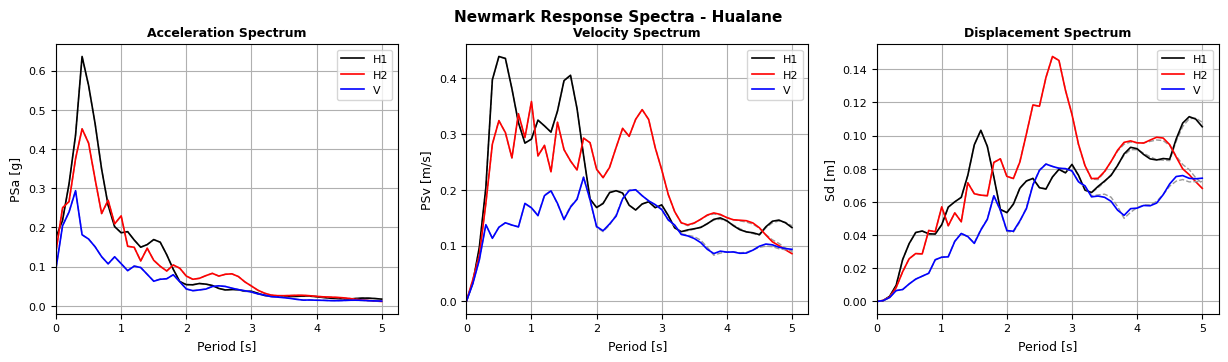

[WARNING] Signal 'Illapel_Algarrobo1985_X.txt' was padded with zeros to reach 37473 samples.
[WARNING] Signal 'Illapel_Algarrobo1985_Z.txt' was padded with zeros to reach 37473 samples.

📌 Earthquake ID: Illapel
Sampling interval (dt): 0.001583 s
Number of samples: 37473
Total duration: 59.32 s
Component information:
  - H1: file='Illapel_Algarrobo1985_X.txt', RMS=1.8130e-02
  - H2: file='Illapel_Algarrobo1985_Y.txt', RMS=1.6208e-02
  - V: file='Illapel_Algarrobo1985_Z.txt', RMS=9.5598e-03



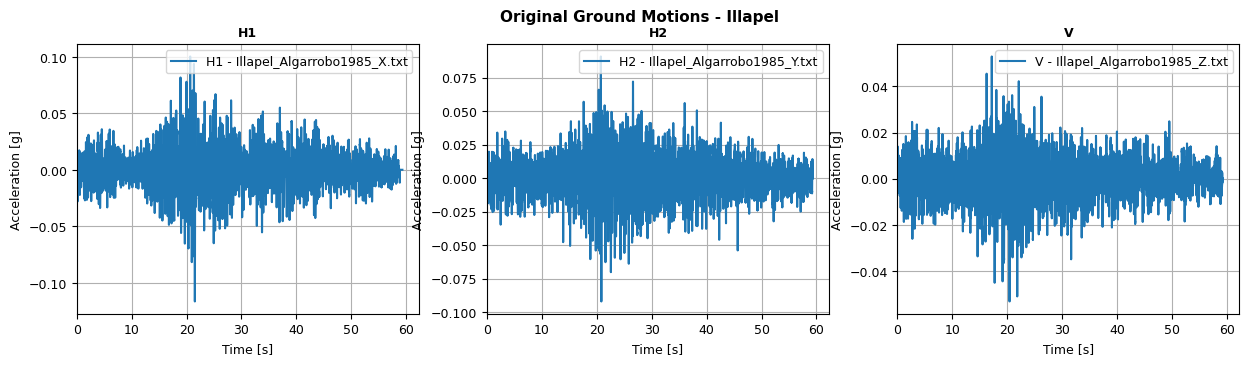

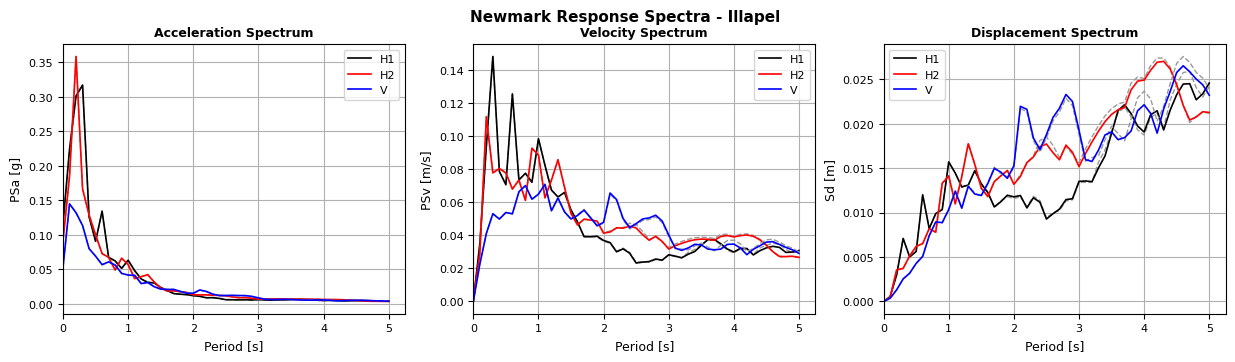

[WARNING] Signal 'Iloca_Algarrobo1985_X.txt' was padded with zeros to reach 21001 samples.
[WARNING] Signal 'Iloca_Algarrobo1985_Z.txt' was padded with zeros to reach 21001 samples.


In [ ]:
processor = EarthquakeBatchProcessor(registers_path, config)
earthquake = processor.process_all()


### For each earthquake

In [ ]:
# earthquake['APED'].print_summary()
# earthquake['APED'].plot_original_signals()
# earthquake['APED'].plot_corrected_signals()
# earthquake['APED'].plot_arias_signals()
# earthquake['APED'].plot_fourier_signals()
# earthquake['APED'].plot_newmark_spectra()


In [ ]:
record = earthquake['ChillanInstitute']


print("🔹 Arias Intensity")
print(f"Significant Duration Start  : {record.arias['H1']['t_start']:.3f} s")
print(f"Significant Duration End    : {record.arias['H1']['t_end']:.3f} s")
print(f"Total Arias Intensity       : {record.arias['H1']['IA_total']:.5f} m/s")
print(f"Destructive Potential Index : {record.arias['H1']['pot_dest']:.5f}")


print("\n🔹 Fourier Analysis")
print("Dominant Periods (s):", record.fourier['H1']['dominant_periods'])

## Keys and Methods

In [ ]:

first_key = next(iter(earthquake))
eq = earthquake[first_key]

print("Keys:")
for key in vars(eq):
    print(f"  - {key}")

print("\nMethods:")
import inspect
methods = [name for name, obj in inspect.getmembers(eq, inspect.ismethod) if not name.startswith('_')]
for m in methods:
    print(f"  - {m}()")

### All spectra

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os

# --- Calcular ruta correcta ---
project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..', '..'))
output_dir = os.path.join(project_root, 'outputs')
os.makedirs(output_dir, exist_ok=True)
svg_path = os.path.join(output_dir, "all _records_algarrobo1985.svg")

# --- Graficar espectros ---
plt.figure(figsize=(14, 4))

# Subplot para H1
plt.subplot(1, 2, 1)
for rsn, eq in earthquake.items():
    try:
        T_H1 = eq.newmark_spectra['H1']['T']
        PSa_H1 = eq.newmark_spectra['H1']['PSa']
        plt.plot(T_H1, PSa_H1, linewidth=1.5, label=f"{rsn}")
    except KeyError:
        print(f"Warning: {rsn} missing H1 spectrum")

plt.title("Component H1", fontsize=10, fontweight='bold')
plt.xlabel("Period [s]", fontsize=9, fontweight='bold')
plt.ylabel("PSa [g]", fontsize=9, fontweight='bold')
plt.grid(True, which='both')
plt.xlim(left=0, right=5)
plt.tick_params(axis='both', labelsize=8)
plt.legend(fontsize=7, loc='upper right', ncol=2)

# Subplot para H2
plt.subplot(1, 2, 2)
for rsn, eq in earthquake.items():
    try:
        T_H2 = eq.newmark_spectra['H2']['T']
        PSa_H2 = eq.newmark_spectra['H2']['PSa']
        plt.plot(T_H2, PSa_H2, linewidth=1.5, label=f"{rsn}")
    except KeyError:
        print(f"Warning: {rsn} missing H2 spectrum")

plt.title("Component H2", fontsize=10, fontweight='bold')
plt.xlabel("Period [s]", fontsize=9, fontweight='bold')
plt.ylabel("PSa [g]", fontsize=9, fontweight='bold')
plt.grid(True, which='both')
plt.xlim(left=0, right=5)
plt.tick_params(axis='both', labelsize=8)
plt.legend(fontsize=7, loc='upper right', ncol=2)

plt.suptitle("All Records Algarrobo1985", fontsize=11, fontweight='bold')

# --- Guardar como SVG en outputs/
plt.savefig(svg_path, format='svg')
plt.show()




### Rotd100

In [ ]:


# Create figure with 1 row and 1 column
plt.figure(figsize=(7, 4))

# Subplot for ROTD100
plt.subplot(1, 1, 1)
for rsn, eq in earthquake.items():
    try:

        T = eq.rotd['T']
        PSa_rotd100 = eq.rotd['ROTD100']
        pga = round(PSa_rotd100[0], 3)
        plt.plot(T, PSa_rotd100, linewidth=1.5, label=f"{rsn} -PGA:{pga} g")
    except KeyError:
        print(f"Warning: {rsn} missing ROTD100 spectrum")

plt.title("ROTD100 - All Records", fontsize=10, fontweight='bold')
plt.xlabel("Period [s]", fontsize=9, fontweight='bold')
plt.ylabel("PSa [g]", fontsize=9, fontweight='bold')
plt.grid(True, which='both')
plt.xlim(left=0, right=5)
plt.tick_params(axis='both', labelsize=8)
plt.legend(fontsize=7, loc='upper right', ncol=2)
plt.tight_layout()
plt.show()
